**List 5** - Algorithms and Data Structures 2021, WUST - F13

*Author:* Mateusz Machaj, 262288

*Date:* 14.12.2021

-----------------------

In [7]:
import numpy as np
from scipy import linalg
import time
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import copy
import turtle
from typing import Any
from __future__ import annotations


-----------------------

# Task 1

##### Experimental analysis of  `scipy.linalg.solve` function complexity

-----------------------

### Algorithm

For random A matrix and random B vector of a given size we are going to analyse `solve` function complexity. Algorithm is unknown.

    linalg.solve(A, B)

Input data size is $n$ - number of variables in system. Therefore, $A$ matrix has dimensions $n\times n$.

### Tools for measurement

At first, I create a function that uniformly generates random systems of a given size.

In [2]:
def prep_rand_syst(size: int) -> tuple:
    """Generate a random system of equations from uniform distribution.
    Use values between 0 and 1 for each coefficient.

    Args:
        size (int): Size of matrix (number of variables in system).

    Returns:
        tuple: Random matrix and vector for a system of equations.
    """

    a = np.random.rand(size, size)
    b = np.random.rand(size, 1)
    return (a, b)


Next, we have got a function measuring `solve` performace time.

In [3]:
def time_check(size: int) -> float:
    """Chceck the performance time for `solve` function and given system size. 

    Args:
        size (int): Number of unknown variables.

    Returns:
        float: Time of the operation.
    """
    matrices = prep_rand_syst(size)

    time_a = time.time()
    linalg.solve(*matrices)
    time_b = time.time()
    time_diff = time_b - time_a
    return time_diff


Finally a data collecting function, calling `solve` in loop for different sizes.

In [4]:
def collect_data(size: int, step: int) -> tuple:
    """Examine the function `solve` and find the calculation times for a range of sizes.

    Args:
        size (int): Number of unknown variables.
        step (int): Interval between sizes in tested calls.

    Returns:
        tuple: Performance data: (Sizes of system, Times for each size).
    """
    time_reg = []
    rng = range(1, size + 1, step)

    for N in rng:
        time_reg.append(time_check(N))

    return (rng, time_reg)


### Tools for visualisation

Following function can plot graphs of the data and additionally - another "hypothetic" function.

In [6]:
def plot_data(
    x_vals: range, y_vals: list, yscale: str = "linear", function: function = None
):
    """Plot the performance data and optionally the hypothetic function that `solve` converges to in terms of time complexity.

    Args:
        x_vals (range): Sizes of equation systems.
        y_vals (list): Performance times for equation systems.
        yscale (str, optional): Scale on Y axis. Defaults to "linear".
        function (function, optional): Hypothetic function to layer its plot with the data. Defaults to None.
    """
    plt.plot(x_vals, y_vals, "o")
    if function != None:
        f_y_vals = [function(k) for k in x_vals]
        plt.plot(x_vals, f_y_vals)

    plt.yscale(yscale)
    plt.xlabel("System size")
    plt.ylabel("Time")
    plt.title("Solve function performance")
    plt.gca().legend(("Collected data", "Hypothesis"))
    plt.show()


### Collecting data concerning the algorithm performance

For some reasonable size and steps I collect data from function's performace.

In [7]:
size = 14000
step = 1000
data = collect_data(size, step)


<IPython.core.display.Javascript object>

### Initial insight

At this point we can try looking at plots in different y-scales:

- linear

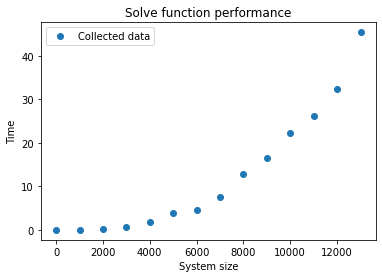

<IPython.core.display.Javascript object>

In [8]:
plot_data(*data)


- logarithmic

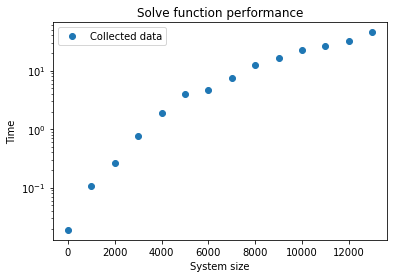

<IPython.core.display.Javascript object>

In [9]:
plot_data(*data, "log")


- symmetrical log

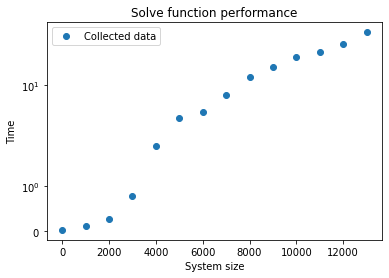

<IPython.core.display.Javascript object>

In [45]:
plot_data(*data, "symlog")


Not a single graph works for initial assumptions, so I will test polynomial complexity hypothestis.

### Hypothesis and its visualization

My first hypothesis would be based on the information from some web sources - that `solve` has $O(n^3)$ time complexity.

I use optimalization fitting tools and define new `f_fit` function as a hypothesis.

In [33]:
def func1(x: float, a: float, b: float, c: float, d: float) -> float:
    """Create a cubic polynomial.

    Args:
        x (float): Independent variable.
        a (float): Cubic coeffictient.
        b (float): Quadratic coefficient
        c (float): Linear coefficient.
        d (float): Constant term.

    Returns:
        float: Value of the polynomial in some point x.
    """
    return a * x ** 3 + b * x ** 2 + c * x + d


<IPython.core.display.Javascript object>

In [35]:
popt1, pcov1 = curve_fit(func1, list(data[0]), data[1])
print(popt1)


[ 1.66025987e-11  3.19686218e-08  1.41719664e-04 -1.42987204e-01]


<IPython.core.display.Javascript object>

In [14]:
def f_fit1(x: float) -> float:
    """Create a cubic polynomial with appropriate coefficients.

    Args:
        x (float): Independent variable.

    Returns:
        float: Polynomial with optimal numbers set as coefficients.
    """
    return func1(x, *popt1)


<IPython.core.display.Javascript object>

Plot for $f_1(x) = 1.66\cdot10^{-11}x^3+3.2\cdot10^{-8}x^2+1.42\cdot10^{-4}x-1.42\cdot10^{-1}$:

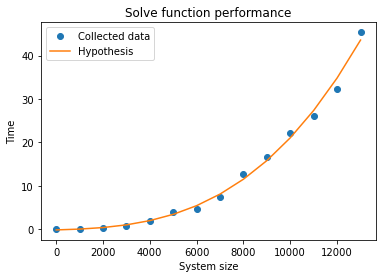

<IPython.core.display.Javascript object>

In [31]:
plot_data(*data, function=f_fit1)


It looks as the right one, although the large values are more important for the experiment. The first coeffitient $1.66\cdot10^{-11}$ is not big, so I will also try another polynomial:

$$f_2(x)=ax^3+bx^2+c$$

In [36]:
def func2(x: float, a: float, b: float, c: float) -> float:
    """Create a quadratic polynomial.

    Args:
        x (float): Independent variable.
        a (float): Quadratic coefficient
        b (float): Linear coefficient.
        c (float): Constant term.

    Returns:
        float: Value of the polynomial in some point x.
    """
    return a * x ** 2 + b * x + c


<IPython.core.display.Javascript object>

In [37]:
popt2, pcov2 = curve_fit(func2, list(data[0]), data[1])
print(popt2)


[ 3.55769104e-07 -1.48100176e-03  1.28313802e+00]


<IPython.core.display.Javascript object>

In [15]:
def f_fit2(x: float) -> float:
    """Create a quadratic polynomial with appropriate coefficients.

    Args:
        x (float): Independent variable.

    Returns:
        float: Polynomial with optimal numbers set as coefficients.
    """
    return func2(x, *popt2)


<IPython.core.display.Javascript object>

Plot for $f_2(x) = 3.55\cdot10^{-7}x^2+1.48\cdot10^{-3}x-1.28$:

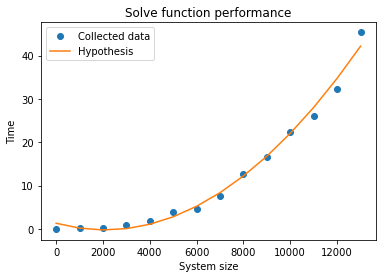

<IPython.core.display.Javascript object>

In [40]:
plot_data(*data, function=f_fit2)


### Prediction

Let us try predictions for sizes $n=16000$ and $n=18000$.

First - the $f_1(x)$ function.

In [41]:
f_fit1(16000)


78.312738686897

<IPython.core.display.Javascript object>

In [32]:
f_fit1(18000)


109.59215555769234

<IPython.core.display.Javascript object>

Next - $f_2(x)$ function.

In [42]:
f_fit2(16000)


68.66400041809051

<IPython.core.display.Javascript object>

In [43]:
f_fit2(18000)


89.89429596147565

<IPython.core.display.Javascript object>

### Verification

Now, we have got measured times for real `solve` algorithm:

In [15]:
time_check(16000)


66.60453987121582

<IPython.core.display.Javascript object>

In [22]:
time_check(18000)


85.99206042289734

<IPython.core.display.Javascript object>

### Results

We clearly see that for greater values of $n$, $f_2$ works better.

This is **only a guess**, but it seems that `solve` has **$O(n^2)$ time complexity**.

-----------------------

# Task 2

##### Hanoi tower

-----------------------

Initially, I write a `Stack` class as on the previous list.

In [10]:
class Stack:
    """Standard stack implemented basing on the python list.
    """

    def __init__(self):
        """Create a stack.
        """
        self.items = []

    def isEmpty(self) -> bool:
        """Check if the stack contains any elements.

        Returns:
            bool: Information about emptiness.
        """
        return self.items == []

    def push(self, item: Any):
        """Add an item on the top of the stack.

        Args:
            item (Any): Te item to be added.
        """
        self.items.append(item)

    def pop(self) -> Any:
        """Remove the item from the top of the stack.

        Returns:
            Any: The removed top item.
        """
        return self.items.pop()

    def peek(self) -> Any:
        """Show the item from the top of the stack. 

        Returns:
            Any: The top item.
        """
        return self.items[len(self.items)-1]

    def size(self) -> int:
        """Measure the length of the queue.

        Returns:
            int: Length of the queue.
        """
        return len(self.items)


For purposes of analysis, there is a function parsing the state of towers in a given moment.

In [11]:
def cell_saver(cells: list) -> list:
    """Collect the state of towers for a given moment.

    Args:
        cells (list): List of genuine towers as stacks.

    Returns:
        list: List of tower states.
    """
    record = []
    for cell in cells:
        cell_copy = copy.deepcopy(cell)
        record.append(cell_copy.items)
    return record


Then, I use a function moving single disks between towers.

In [12]:
def move_disk(prev_tower: Stack, new_tower: Stack):
    """Move a disk from one tower to another.

    Args:
        prev_tower (Stack): Curent tower.
        new_tower (Stack): New tower.
    """
    disk = prev_tower.pop()
    new_tower.push(disk)

Additionally, a standard recursion algorithm to move towers from *base* to *target*, using *auxiliary* one. It also saves the tower states.

In [13]:
def move_tower(
    disks_n: int,
    base_tower: Stack,
    targ_tower: Stack,
    aux_tower: Stack,
    reg: list,
    real_towers: list,
):
    """Use recursion to solve hanoi towers problem and set disks on stakes in right order.
    Save states after each step to the register.

    Args:
        disks_n (int): Total number of disks.
        base_tower (Stack): Tower to grab disks from.
        targ_tower (Stack): Tower to put the disks on.
        aux_tower (Stack): Auxiliary tower.
        reg (list): Register of states.
        real_towers (list): List of genuine tower (stack) instances in constant order.
    """
    if reg == []:
        reg.append(cell_saver(real_towers))
    if disks_n >= 1:
        move_tower(disks_n - 1, base_tower, aux_tower,
                   targ_tower, reg, real_towers)
        move_disk(base_tower, targ_tower)
        reg.append(cell_saver(real_towers))

        move_tower(disks_n - 1, aux_tower, targ_tower,
                   base_tower, reg, real_towers)


We also have to load the *base tower* before any operation.

In [14]:
def load_tower(items: list, tower: Stack):
    """Load the tower with items from list. Order is according to the list.

    Args:
        items (list): Variables representing disks.
        tower (Stack): Tower to load.
    """
    while not tower.isEmpty():
        tower.pop()
    for item in reversed(items):
        tower.push(item)


Before the results, I write a visualization function.

In [15]:
def visual_hanoi(reg: list) -> str:
    """Prepare a visualization of the hanoi solving process.

    Args:
        reg (list): Register of states.

    Returns:
        str: Visualisation of steps.
    """
    mt = copy.deepcopy(reg)

    max_size_el = max(map(len, mt[0]))
    max_size_real = max(map(len, map("".join, mt[0])))

    for i, step in enumerate(mt):
        for j, tower in enumerate(step):
            new_cell = "-".join(map(str, mt[i][j])) + "-"
            diff_in_chars = max_size_el + max_size_real - len(new_cell)
            mt[i][j] = "|" + new_cell + "-" * (diff_in_chars)

            ind_repr = str(i)
            ind_repr_fx = (
                ind_repr
                + "."
                + " " * int(np.floor(np.log10(len(mt))) + 1 - len(ind_repr))
            )
        mt[i] = (
            ind_repr_fx
            + "    A:   "
            + step[0]
            + "    B:   "
            + step[1]
            + "    C:   "
            + step[2]
        )

    out_tab = "\n".join(mt)
    out_tab = "Order:   " + " -> ".join(map(str, reg[0][0])) + "\n\n" + out_tab

    return out_tab


Finally, do the actions and analyse the performance.

I create a *register* to save the moves too.

In [16]:
towers = Stack(), Stack(), Stack()
base_tower, aux_tower, targ_tower = towers
disks = ["S", "M", "L", "XL", "XXL"]

hanoi_reg = []

load_tower(disks, base_tower)


In [17]:
move_tower(base_tower.size(), base_tower,
           targ_tower, aux_tower, hanoi_reg, towers)
print(visual_hanoi(hanoi_reg))


Order:   XXL -> XL -> L -> M -> S

0.     A:   |XXL-XL-L-M-S-    B:   |-------------    C:   |-------------
1.     A:   |XXL-XL-L-M---    B:   |-------------    C:   |S------------
2.     A:   |XXL-XL-L-----    B:   |M------------    C:   |S------------
3.     A:   |XXL-XL-L-----    B:   |M-S----------    C:   |-------------
4.     A:   |XXL-XL-------    B:   |M-S----------    C:   |L------------
5.     A:   |XXL-XL-S-----    B:   |M------------    C:   |L------------
6.     A:   |XXL-XL-S-----    B:   |-------------    C:   |L-M----------
7.     A:   |XXL-XL-------    B:   |-------------    C:   |L-M-S--------
8.     A:   |XXL----------    B:   |XL-----------    C:   |L-M-S--------
9.     A:   |XXL----------    B:   |XL-S---------    C:   |L-M----------
10.    A:   |XXL-M--------    B:   |XL-S---------    C:   |L------------
11.    A:   |XXL-M-S------    B:   |XL-----------    C:   |L------------
12.    A:   |XXL-M-S------    B:   |XL-L---------    C:   |-------------
13.    A:   |XXL

-----------------------

# Task 3

##### Hilbert curve

-----------------------

To draw a Hilbert curve I use a recursive algorithm. I also remember to normalize the size, changing the `lenght` in the first call.

In [20]:
def hilbert(n: int, angle: float, length: float, turtle: turtle.Turtle, first: bool = False):
    """Draw Hilbert curve with given parameters.

    Args:
        n (int): Degree of detail.
        angle (float): Angle to rotate abotu (-90 or 90 deg).
        length (float): Length of a general square side.
        turtle (turtle.Turtle): Drawing turtle (artist).
        first (bool, optional): Flag determining if it is the first call. Defaults to False.
    """
    if first:
        length = length / (2**(n) - 1)

    if n != 0:
        turtle.right(angle)
        hilbert(n-1, -angle, length, turtle)
        turtle.forward(length)
        turtle.left(angle)
        hilbert(n-1, angle, length, turtle)
        turtle.forward(length)
        hilbert(n-1, angle, length, turtle)
        turtle.left(angle)
        turtle.forward(length)
        hilbert(n-1, -angle, length, turtle)
        turtle.right(angle)


Having set a turtle in the right place (to have a centered image) I draw the shape using the algorithm above.

In [21]:
def draw_hilbert(n: int, length: float):
    """Create a turtle and perform the whole drawing process for Hilbert curve (centering the image).

    Args:
        n (int): Degree of detail.
        length (float): Length of a general square side.
    """
    my_turtle = turtle.Turtle()
    my_turtle.speed(20)
    my_turtle.color("blue")
    my_turtle.pensize(2)
    my_turtle.penup()
    my_turtle.setposition(-length / 2, length / 2)
    my_turtle.pendown()

    hilbert(n, 90, length, my_turtle, True)
    turtle.done()


The final effect is:

<font color='red' size='4'>**Warning!** Sometimes there is a need to repeat the call of the function below (due to the issues with the library).</font>

In [22]:
draw_hilbert(4, 400)


-----------------------

# Task 4

##### Koch snowflake

-----------------------

To draw one Koch curve I use a recursive algorithm. I also remember to normalize the size, changing the `lenght` in the first call.

In [24]:
def koch(n: int, length: float, turtle: turtle.Turtle, first: bool = False):
    """Draw Koch curve with given parameters.

        n (int): Degree of detail.
        length (float): Length of a general square side.
        turtle (turtle.Turtle): Drawing turtle (artist).
        first (bool, optional): Flag determining if it is the first call. Defaults to False.
    """
    if first:
        length = length / (3**(n-1))

    if n == 1:
        turtle.forward(length)
    else:
        koch(n-1, length, turtle)
        turtle.left(60)
        koch(n-1, length, turtle)
        turtle.right(120)
        koch(n-1, length, turtle)
        turtle.left(60)
        koch(n-1, length, turtle)


Whole snowflake consists of three Koch curves.

In [25]:
def snowflake(n: int, length: float, turtle: turtle.Turtle):
    """Draw Koch snowflake with given parameters.

    Args:
        n (int): Degree of detail.
        length (float): Length of a general square side.
        turtle (turtle.Turtle): Drawing turtle (artist).
    """
    for _ in range(3):
        koch(n, length, turtle, True)
        turtle.right(120)


Having set a turtle in the right place (to have a centered image) I draw the shape using the algorithms above.

In [26]:
def draw_koch(n: int, length: float):
    """Create a turtle and perform the whole drawing process for Koch snowflake (centering the image).

    Args:
        n (int): Degree of detail.
        length (float): Length of a general square side.
    """
    my_turtle = turtle.Turtle()
    my_turtle.speed(20)
    my_turtle.color("blue")
    my_turtle.pensize(2)
    my_turtle.penup()
    my_turtle.setposition(-length / 2, length / 3)
    my_turtle.pendown()

    snowflake(n, length, my_turtle)
    turtle.done()

The final effect is:

<font color='red' size='4'>**Warning!** Sometimes there is a need to repeat the call of the function below (due to the issues with the library).</font>

In [28]:
draw_koch(5, 400)

-----------------------